# Predicting heart disease using Machine Learning

This notebook looks into using various Python based Machine Learning and Data Science libraries  in an attempt to build machine learning model capable of predicting whether or not someone has heart disease or not based on their medical attributes.

We are going to take following approach:

* Problem Definition 
* Data
* Evaluation 
* Features 
* Modelling
* Experimentation

## 1. Problem Definition:

In a statement,
> Based on the data, predict whether a person has heart disease or not.

## 2. Data:

The original data came from the Cleaveland data from the UCI machine learning repository.
There is also a version of it available on kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

##  4. Features:

**Create data dictionary**

* age
* sex(1 = male; 0= female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (1 = True, 0= False)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina(1= yes; 0= No)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 0 or 1.


**Heart Disease Data Dictionary**
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
1. : Nothing to note
2. : ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
3. : Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
1. : Upsloping: better heart rate with excercise (uncommon)
2. : Flatsloping: minimal change (typical healthy heart)
3. : Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)
**Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

### Preparing our tools:
We are going to use pandas, numpy and matplotlib for data analysis and manipulation.

In [2]:
!pip install seaborn

In [3]:
# Import all the tools we need

#Regular EDA(exploratory data analysis) and plotting libraries.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
# we want our plots to appear in the notebook
%matplotlib inline

#Models from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\heart-disease.csv")

In [5]:
df.shape

(303, 14)

## Data Exploration(exploratory data anlysis on EDA)
The goal here to understand more about the data and become subject matter expert on it.

* What questions are we trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do we deal with it?
* where are th outliers and why should we care about them?
* How can we add , remove or change features to get more from the data?


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

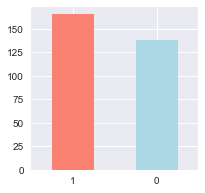

In [8]:
plt.style.use("seaborn")
df["target"].value_counts().plot.bar(color= ['salmon', 'lightblue'],figsize=(3,3))
plt.xticks(rotation = 0);


In [9]:
#to check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# to check any Nan/missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Heart Disease frequency according to sex**

In [13]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


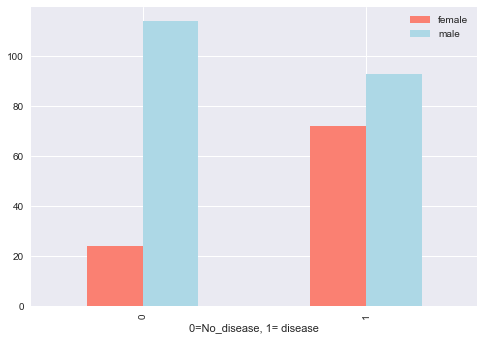

In [15]:
pd.crosstab(df["target"],df["sex"]).plot.bar(color = ["salmon", "lightblue"])
plt.xlabel("0=No_disease, 1= disease")
plt.legend(["female", "male"]);

**Age vs Max Heart Rate(thalach) for Heart Disease**

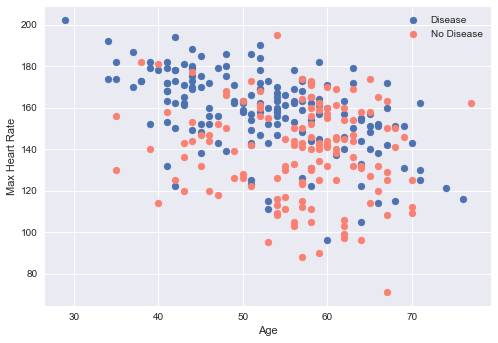

In [16]:
#Scatter with positive example
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target==1])
#Scatter with negative example:
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],c= 'salmon')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

In [15]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

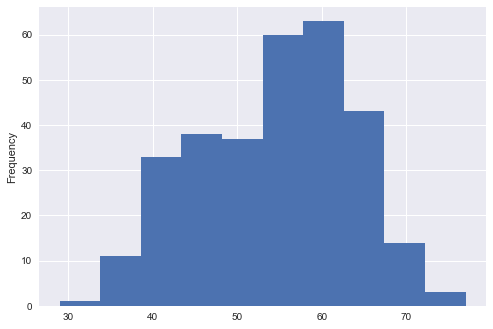

In [16]:
# Distribution Plot
#check the distribution of age column with the help of histogram
df["age"].plot.hist();


**Heart Disease Frequency per chest pain type**
*  cp - chest pain type
0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


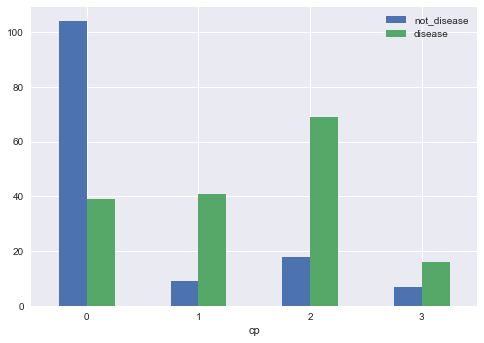

In [18]:
# Make the crosstab more visual
pd.crosstab(df['cp'], df['target']).plot.bar()
plt.legend(["not_disease", "disease"])
plt.xticks(rotation = 0);# no. displayed on  xaxis is displayed properly

In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


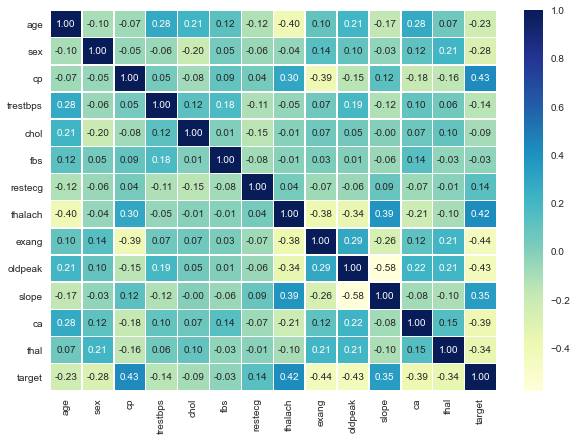

In [20]:
# Plotting for better understability
corr_matrix =df.corr()
fig,ax = plt.subplots(figsize= (10,7))
ax= sns.heatmap(corr_matrix,
               annot = True,
               linewidth = 0.5,
               fmt = ".2f",
               cmap = "YlGnBu");

## 5.Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x= df.drop("target", axis = 1)
y= df["target"]

np.random.seed(42)

#Split into train and test set
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


* Now we have got our data into training and test sets, we have to decide which ML model we should use.
* we'll train it(find patterns) on the training set
* Test it(use the patterns) on test set.

**We are going to try 3 different ML models:**
* Logistic Regression
* K-nearest Neighbors Classifiers
* RandomForestClassifier

In [23]:
#Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         "K-Neighbors": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}
#Create a function to fit and score model:
def fit_and_score(models, x_train,x_test, y_train, y_test):
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name,model in models.items():
        model.fit(x_train, y_train)
        #evaluate the model and append its scores to model_scores
        model_scores[name]= model.score(x_test,y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


C:\Users\user\Desktop\h_d_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Neighbors': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### Model Comparison

<AxesSubplot:>

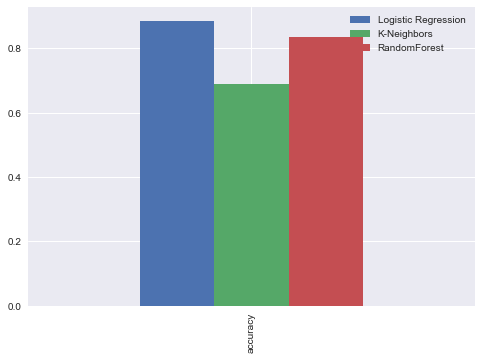

In [25]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.plot.bar()

<AxesSubplot:>

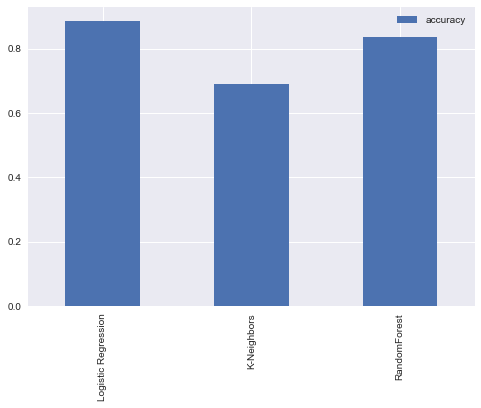

In [26]:
# taking Transpose  for clarity
model_compare.T.plot.bar()


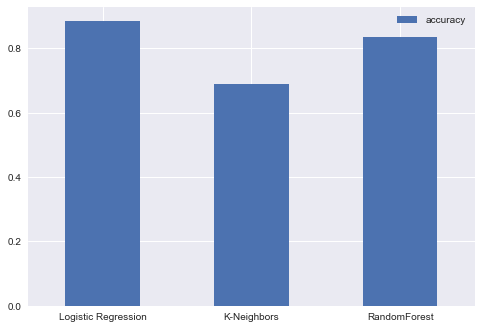

In [27]:
model_compare.T.plot.bar()

plt.xticks(rotation = 0);


Now that we have got our baseline results :
Lets's look at these factors:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* F1 
* Recall
* Classification Report
* ROC curve
* Area under curve(AUC)

### Hyperparameter tuning

**Lets tune and improvise kNeighborsclassifer() model's score(By Hand)**

In [28]:
model_train =[]
model_score= []
# create a list of different values for n-neighbors()

neighbors = range(1, 21)# by default its 5

knn = KNeighborsClassifier()
# Loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    #Fit the algorithm
    knn.fit(x_train, y_train)
    #append the training scores 
    model_train.append(knn.score(x_train, y_train))
    # append the test scores
    model_score.append(knn.score(x_test, y_test))

In [29]:
model_train

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
model_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

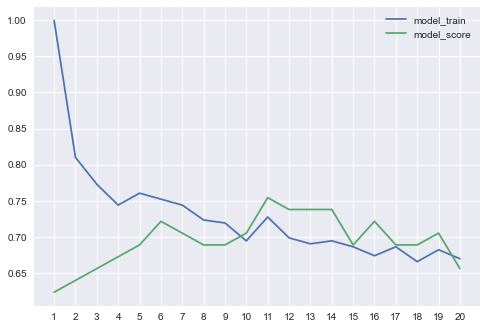

In [31]:
plt.style.use("seaborn")
plt.plot(neighbors, model_train, label= "model_train")
plt.plot(neighbors, model_score, label ="model_score")
plt.xticks(np.arange(1,21))
plt.xlabel = ("Number of neighbors")
plt.ylabel = ("model score")
plt.legend();

**Hyperparameter tuning using RandomizedSearchCV**

We are going to tune:
* Logistic Regression
* RandomForestClassifier

In [32]:
# Create Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}
#Create hyperparmater grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None, 3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

check below links for better understanding of LogisticRegression tuning using RSCV
* https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

Now we have got hyperparameters grid setup for each of our models,lets tune them using RandomizedsearchCV

In [33]:
#Tune LogisticRegression
np.random.seed(42)

#setup random Hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv= 5,
                               n_iter = 20,
                               verbose = True)
#Fit random Hyperparamter model for logisticregression

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [36]:
model_scores# baseline results as earlier
# we can see there is no diff. in results in log regg after tuning using randomizedsearchcv

{'Logistic Regression': 0.8852459016393442,
 'K-Neighbors': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [37]:
#Tune RandomForestClassifier
np.random.seed(42)

# setup Hyperparameter search for RandomForest using RandomizedSearhCV

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv= 5,
                           n_iter = 20,
                           verbose = True)
# Fit random hyperparameter search  model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
#Find the best hyperparams
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# Evaluate the randomizedsearched RandomForestClassifier() model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [40]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Neighbors': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [41]:
#Notice that we got increase in RandomForest results . Its still less than baseline result of LogReg.

### Hyperparameter tuning with GridSearchCV
Since our Logistic Regressiom model provides best score, we will try and improve using GridSearchCv

In [42]:
# Different Hyperparameters for out LogisticRegressionModel
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid Hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid = log_reg_grid,
                        cv=5,
                        verbose =True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC
* COnfusion matrix
* Classification Report
* Precision
* Recall 
* F1 score,
and it would be great if cross validation is used where possible.

In [45]:
#To make comparisons and evaluate our trained model, first need to make predictions

In [46]:
#Make predictions with tuned model:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate
* False Positive Rate

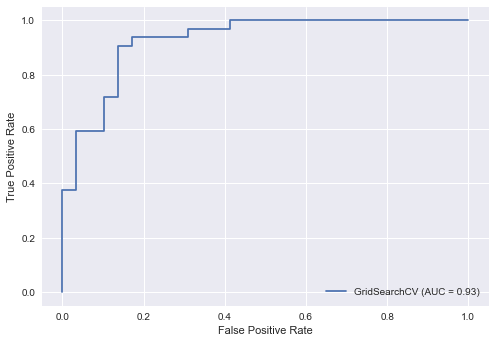

In [48]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

In [49]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [50]:
sns

<module 'seaborn' from 'C:\\Users\\user\\Desktop\\h_d_project\\env\\lib\\site-packages\\seaborn\\__init__.py'>

<AxesSubplot:>

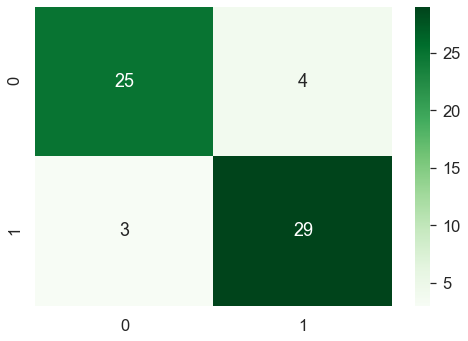

In [51]:
sns.set(font_scale = 1.5)
sns.heatmap(conf_mat, annot = True, cmap ="Greens")

<AxesSubplot:>

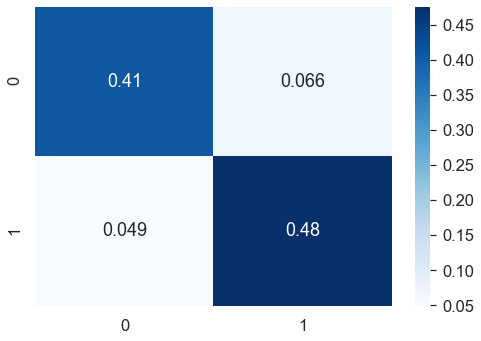

In [52]:
#Percent wise
sns.heatmap(conf_mat/np.sum(conf_mat),annot =True, cmap ='Blues')

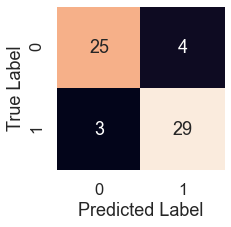

In [53]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize =(3,3))
    ax= sns.heatmap(conf_mat,
                   annot =True,
                   cbar = False)
    ax.set(xlabel = 'Predicted Label',
           ylabel = 'True Label')
    
    
plot_conf_mat(y_test, y_preds)

In [54]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

* Now that we have ROCcurve, AUC metric and a coinfusion matrix,lets get a classification report as well as cross-validated precision, recall and f1-score.

In [55]:
print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calclate Evaluation metrics using Cross Validation
We are going to calculate accuracy, precision, recall and f1 score using cross validation and to do so we'll be using `cross_val_score`

In [56]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
#Create a new classifier model for best scoore
clf = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

In [58]:
# Cross validated accuracy

cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv= 5,
                        scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [59]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [60]:
# Cross validated precision

cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv= 5,
                        scoring = 'precision')

cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [61]:
# Cross validated recall

cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv= 5,
                        scoring = 'recall')

cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [62]:
# Cross validated f1_Score

cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv= 5,
                        scoring = 'f1')

cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [63]:
# Visulaize our cross-validatd metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
             "Precision": cv_precision,
             "Recall": cv_recall,
             "f1": cv_f1},
                         index=[0])
                          


<AxesSubplot:>

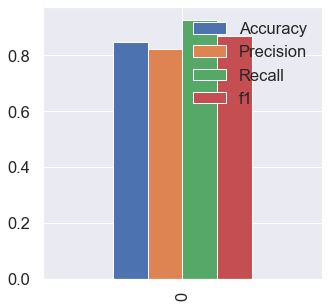

In [64]:
cv_metrics.plot.bar(figsize=(5,5))

<AxesSubplot:>

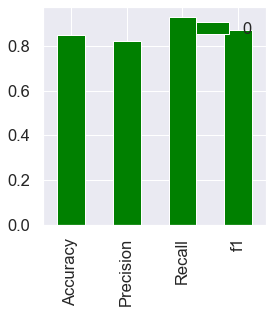

In [65]:
cv_metrics.T.plot.bar(color="green", figsize= (4,4))

### Feature importance
Feature importance is another way of "asking which characteristic contributed more to the outcome and how did they contribute?"
* Finding feature importance is different to each Machine Learning models.One way to find feature importance is by searching "Mode Name feature importance"
Lets find the feature importance for our machine laearning model

In [66]:
# Fit an instance for machine learning model
# gs_log_reg.best_params_ for c and solver

clf = LogisticRegression(C=0.20433597178569418,
                        solver= 'liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [67]:
#check coeff(coefficient)
clf.coef_
# it gives results how each parameter contributes to the target section i.e each column 

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [68]:
#Match coef's of features to columns:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

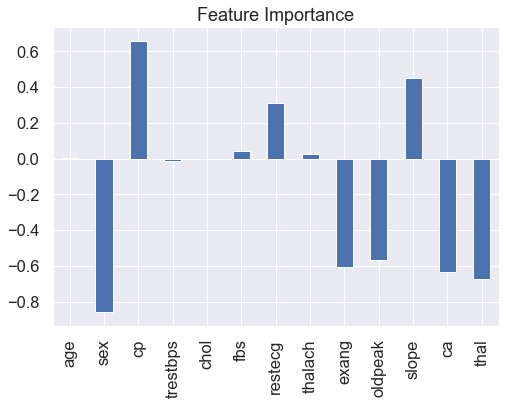

In [69]:
# Visualize feature importance
feature_df =pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title ="Feature Importance", legend = False);

In [70]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


### 6. Experimentation
If we haven't hit evaluation metric yet. Need to ask:
* Could you collect more data?
* Try a better model? like CatBoost or XGBoost?
* Can current model be improved(beyound waht we've done so far)
* If model is good enough, how to export it and share to others?